## 1. Import packages

Imports packages, starts the environment, also views the structure of the environment


In [1]:

from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import random
import torch
from MemBuffer import ReplayBuffer
import gym

from DDPGAgent import Agent

import matplotlib.pyplot as plt
#"OneAgent/Reacher_Windows_x86_64/Reacher.exe"
env = UnityEnvironment(file_name="Reacher_Windows_x86_64/Reacher.exe")
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name)

cuda:0


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


ReacherBrain


## 2. Explore environment

Explore the environment, find the number of agents and state/action space sizes.

In [2]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## 3. Initialize the agent

Initializes the agent that will train.

In [3]:
#env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)
seed = 1
#BUFFER_SIZE = int(1e6)  # replay buffer size
#BATCH_SIZE = 128        # minibatch size
#GAMMA = 0.99            # discount factor


agents = Agent(state_size,action_size,seed)
#memory = ReplayBuffer(action_size,BUFFER_SIZE,BATCH_SIZE,seed)
print("Completed block.")

Completed block.


## 4. The training function

In [4]:

def ddpg(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
        Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = np.zeros(num_agents)     
    scoresTemp = []                        #  list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    max_Score = -np.Inf
    #print("got here 0")
    for i_episode in range(1, n_episodes+1):
        timestep=1
        #print("got here 1")
        env_info = env.reset(train_mode=True)[brain_name]
        #print("got here 2")
        states = env_info.vector_observations
        scores = np.zeros(num_agents,)
        #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        #print("got here 3")
        agents.reset()
        while True:
            #for i in range(num_agents):
            #    actions[i] = agents[i].act(states[i], eps).astype(int)
            #actions = np.clip(actions, -1, 1)  
            actions = agents.act(states)
            #print(" 4",tempcount, end="")
            env_info = env.step(actions)[brain_name]

            next_states = env_info.vector_observations   # get the next state
            
            rewards = env_info.rewards                   # get the reward
            #print(rewards[0])
            dones = env_info.local_done                 # see if episode has finished
            agents.step(states,actions,rewards,next_states,dones,timestep)
            #for i in range(num_agents):
            #    memory.add(states[i], actions[i], rewards[i], next_states[i], dones[i])
                
            #if timestep%20==0:
                
            #    if len(memory) > BATCH_SIZE:
            #        for i in range(num_agents):
            #            for j in range(10):
            #                experiences = memory.sample()
             #               agents[i].learn(experiences, GAMMA)
                #agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            states = next_states
            scores += np.array(rewards)
            timestep +=1
            if np.any(dones):
                break 
        meanScore = np.mean(scores)
        scores_window.append(meanScore)       # save most recent score
        scoresTemp.append(meanScore)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tScore: {:.2f}\tAverage: {:.2f}'.format(i_episode, meanScore,np.mean(scores_window)))
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        #if i_episode % 100 == 0:
        #    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0 and i_episode >100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scoresTemp
print("completed block.")

completed block.


## 5. Run the Training

And Plot the results

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
d:\Workspace\UdacityProjects\deep-reinforcement-learning\p2_continuous-control\DDPGAgent.py:114: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
d:\Workspace\UdacityProjects\deep-reinforcement-learning\p2_continuous-control\DDPGAgent.py:123: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.actor_local.parameters(), 1)


Episode 1	Score: 0.74	Average: 0.74
Episode 2	Score: 1.19	Average: 0.97
Episode 3	Score: 1.37	Average: 1.10
Episode 4	Score: 2.21	Average: 1.38
Episode 5	Score: 3.50	Average: 1.80
Episode 6	Score: 4.66	Average: 2.28
Episode 7	Score: 7.24	Average: 2.99
Episode 8	Score: 8.69	Average: 3.70
Episode 9	Score: 14.48	Average: 4.90
Episode 10	Score: 20.11	Average: 6.42
Episode 11	Score: 19.69	Average: 7.63
Episode 12	Score: 23.87	Average: 8.98
Episode 13	Score: 25.97	Average: 10.29
Episode 14	Score: 28.20	Average: 11.57
Episode 15	Score: 29.57	Average: 12.77
Episode 16	Score: 31.45	Average: 13.93
Episode 17	Score: 32.00	Average: 15.00
Episode 18	Score: 34.99	Average: 16.11
Episode 19	Score: 36.33	Average: 17.17
Episode 20	Score: 36.53	Average: 18.14
Episode 21	Score: 36.78	Average: 19.03
Episode 22	Score: 36.71	Average: 19.83
Episode 23	Score: 36.86	Average: 20.57
Episode 24	Score: 36.62	Average: 21.24
Episode 25	Score: 36.33	Average: 21.84
Episode 26	Score: 37.32	Average: 22.44
Episode 27	Scor

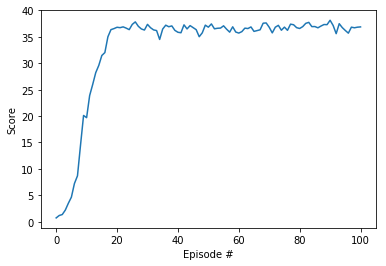

In [5]:
myScores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(myScores)), myScores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 6. Close the Environment

In [6]:
env.close()